In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time

In [2]:
n_walkers = 20
n_hopsperwalker = 2_000

n_samples = n_walkers * n_hopsperwalker
remove = int(1000)
n_used = n_samples-remove*n_walkers
alpha = 0.2
#alpha = 0.209768676824719 #most accurate value we found

hop_size = 0.42                                    # set it in order to get alpha of about 0.5

maxdEda = 0.005                         # minimization won't stop until the derivative of energy is smaller than this number
g = .1                                   # damping factor in steepest descent method.
onlyoneiteration = True
#random.seed(10)

In [3]:
run -i Skeleton.py 

$\frac{\mathrm{d}E(\alpha)}{\mathrm{d}\alpha}  = 2 \left( \left<E_L \frac{\mathrm{d}\ln{\psi_T}}{\mathrm{d}\alpha} \right>-E \left< \frac{\mathrm{d}\ln{\psi_T}}{\mathrm{d}\alpha} \right>\right) $

In [4]:
#Helium
list_alpha = [alpha]
list_energies = [-3] # we assign some value to match the legth of the lists. Later we shall remove the first value since it is arbitrarily chosen here.
list_deda = [1]
tic = time()
pdfparameters = list_alpha
functionparameters = list_alpha
variances = [0]
condition = True
i = 1
while condition:
    pdfparameters = [list_alpha[-1]]
    functionparameters = [list_alpha[-1]]
    dist_x1, dist_y1, dist_z1, dist_x2, dist_y2, dist_z2, accept_ratio, r_rp, rp_r = mcmc_sample_6D(hops=n_samples, pdf = psi2_Helium, pdfparam=pdfparameters)
    dist_x1 = burn_in(states=dist_x1, n_removed=remove)
    dist_y1 = burn_in(states=dist_y1, n_removed=remove)
    dist_z1 = burn_in(states=dist_z1, n_removed=remove)
    dist_x2 = burn_in(states=dist_x2, n_removed=remove)
    dist_y2 = burn_in(states=dist_y2, n_removed=remove)
    dist_z2 = burn_in(states=dist_z2, n_removed=remove)
    #integrate to find energy
    Energy, variance= integrate_6D(func=E_loc, funcparam=functionparameters, dist_x1_=dist_x1, dist_y1_=dist_y1, dist_z1_=dist_z1, dist_x2_=dist_x2, dist_y2_=dist_y2, dist_z2_=dist_z2)
    print("acceptance ratio:",accept_ratio)
    #compute derivative 
    left, _ = integrate_6D(func=E_loc_dlpsida, funcparam=functionparameters, dist_x1_=dist_x1, dist_y1_=dist_y1, dist_z1_=dist_z1, dist_x2_=dist_x2, dist_y2_=dist_y2, dist_z2_=dist_z2)
    right, _ = integrate_6D(func=dlnpsida, funcparam=functionparameters, dist_x1_=dist_x1, dist_y1_=dist_y1, dist_z1_=dist_z1, dist_x2_=dist_x2, dist_y2_=dist_y2, dist_z2_=dist_z2)
    dEda = 2*(left-Energy*right)
    alpha_new = alpha - g*dEda
    #alpha_new = list_alpha[-1] + 0.025
    
    list_energies.append(Energy)
    list_alpha.append(alpha_new)
    
    if abs(dEda) < maxdEda:
        condition = False
    if onlyoneiteration:
        condition = False
    alpha = alpha_new
    variances.append(variance)
    list_deda.append(dEda)
    print(i,"alpha old:", list_alpha[-1], "\nalpha new:", alpha_new, "dE/da = ", dEda)
    i += 1
toc = time()
print("Simulation time in seconds", toc-tic)

acceptance ratio: 0.553575
1 alpha old: 0.20189171018763383 
alpha new: 0.20189171018763383 dE/da =  -0.018917101876338105
Simulation time in seconds 3.2265377044677734


In [5]:
print("Energy:", Energy, "Variance:", variance)

Energy: -2.896014089061704 Variance: 0.13621120941261516


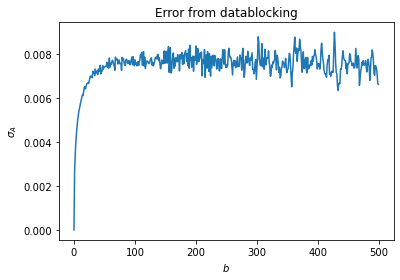

In [6]:
E = E_loc(dist_x1, dist_y1, dist_z1, dist_x2, dist_y2, dist_z2, alpha)
maxb = 500
y = error(E, maxb)
x = np.arange(0, maxb)
figerr = plt.figure()

plt.plot(x,y)
plt.title("Error from datablocking")
plt.xlabel("$b$")
plt.ylabel(r"$\sigma_A$")
plt.show()

#figerr.savefig("Errorwithdatablocking.pdf", bbox_inches='tight')

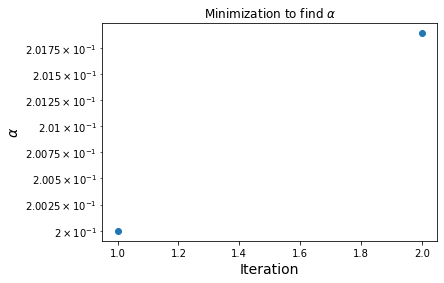

In [7]:
#print(list_energies)
fig = plt.figure()

plt.plot(np.arange(1,len(list_alpha)+1), list_alpha, marker = "o", linestyle = "none")
plt.yscale('log')
plt.title(r"Minimization to find $\alpha$")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel(r"$ \alpha $", fontsize =14)
plt.show()

#fig.savefig("Helium_minimizationfrombelow.pdf", bbox_inches='tight')

In [8]:
#Hydrogen:
alpha = 0.8
list_alpha = [alpha]
list_energies = [-3]
list_deda = [1]
tic = time()
variances = [0]
iterations = 20
tic = time()

for i in range(iterations):
    #Hydrogen
    pdfparameters = [list_alpha[-1]]
    functionparameters = [list_alpha[-1]]
    dist_x, dist_y, dist_z, accept_ratio, r_rp, rp_r = mcmc_sample_3D(hops=n_samples, pdf = psi_Hydrogen, pdfparam=pdfparameters)
    dist_x = burn_in(states=dist_x, n_removed=remove)
    dist_y = burn_in(states=dist_y, n_removed=remove)
    dist_z = burn_in(states=dist_z, n_removed=remove)
    #integrate to find energy
    Energy, variance= integrate_3D(func=E_L_Hydrogen, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    
    #compute derivative 
    left, _ = integrate_3D(func=E_L_Hydrogentimesr, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    right, _ = integrate_3D(func=negativer, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    dEda = 2*(left-Energy*right)
    g = 0.1
    alpha_new = alpha - g*dEda
    #alpha_new = list_alpha[-1] + 0.025
    print("alpha old:", list_alpha[-1], "\n alpha new:", alpha_new)
    
    list_energies.append(Energy)
    list_alpha.append(alpha_new)
    alpha = alpha_new
    variances.append(variance)
    list_deda.append(dEda)
#Hydrogen normal calculation
#for i in list_alpha:
#    pdfparameters = [i]
#    functionparameters = [i]
#    dist_x, dist_y, dist_z, accept_ratio, r_rp, rp_r = mcmc_sample_3D(hops=n_samples, pdf = psi_Hydrogen, pdfparam=pdfparameters)
#    integral, variance= integrate_3D(func=E_L_Hydrogen, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
#    strin = "alpha: " + str(i) + "; integral: " + str((integral)) + " $\pm$ " + str(variance) + "; accepted/total = " + str(accept_ratio)
#    print(strin)
toc = time()
print("Simulation time in seconds", toc-tic)

alpha old: 0.8 
 alpha new: 0.8190080015138793
alpha old: 0.8190080015138793 
 alpha new: 0.8382359273508461
alpha old: 0.8382359273508461 
 alpha new: 0.8537363774700487
alpha old: 0.8537363774700487 
 alpha new: 0.8677396245562845
alpha old: 0.8677396245562845 
 alpha new: 0.8818737525479948
alpha old: 0.8818737525479948 
 alpha new: 0.8914671192687081
alpha old: 0.8914671192687081 
 alpha new: 0.9023885554012349
alpha old: 0.9023885554012349 
 alpha new: 0.9119541096431063
alpha old: 0.9119541096431063 
 alpha new: 0.9212281493553852
alpha old: 0.9212281493553852 
 alpha new: 0.9292697555820288
alpha old: 0.9292697555820288 
 alpha new: 0.9370015891678979
alpha old: 0.9370015891678979 
 alpha new: 0.9434581680273973
alpha old: 0.9434581680273973 
 alpha new: 0.9489456871889386
alpha old: 0.9489456871889386 
 alpha new: 0.9544368057363601
alpha old: 0.9544368057363601 
 alpha new: 0.9590146166273651
alpha old: 0.9590146166273651 
 alpha new: 0.9631935690350308
alpha old: 0.9631935690